In [1]:
import pandas as pd
from time import sleep
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os

url = r"https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest"
key = r"be45d39c-b402-4aed-aa72-6447a9107556"
parameters = {
  'start': '1',
  'limit': '30',
  'convert': 'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': key
}

session = Session()
session.headers.update(headers)

bitcoin_df = pd.DataFrame()

def api_runner(bitcoin_df):
    try:
        response = session.get(url, params=parameters)
        #print(f"HTTP Status Code: {response.status_code}")
        #print(f"Response Headers: {response.headers}")
        #print(f"Raw Response Text: {response.text}")

        # Controleer of de response een geldige JSON bevat
        try:
            data = response.json()
            #if 'data' in data:
                #print(json.dumps(data, indent=4))  # Mooi geformatteerde output
            #else:
                #print("No 'data' key found in JSON response.")
        except json.JSONDecodeError:
            print("Response is not in JSON format")
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(f"Errormessage: \n{e}")
        return bitcoin_df  # Return the current dataframe if an error occurs

    df_data = data["data"]
    bitcoin_df= pd.json_normalize(df_data)
    bitcoin_df['timestamp'] = pd.to_datetime('now')

    
    if not os.path.isfile(r"C:\Users\Stichting GeoFort\Documents\0. Coding\8. Data-analist_Privat\Python\api.csv"):
        bitcoin_df.to_csv(r"C:\Users\Stichting GeoFort\Documents\0. Coding\8. Data-analist_Privat\Python\api.csv", header='column_names')
    else:
        bitcoin_df.to_csv(r"C:\Users\Stichting GeoFort\Documents\0. Coding\8. Data-analist_Privat\Python\api.csv", header=False, mode='w')
    
    
    
    return bitcoin_df

for i in range(2):
    bitcoin_df = api_runner(bitcoin_df)
    print(f"Runner completed data. DataFrame Dimension: {bitcoin_df.shape}")
    sleep(2)


Runner completed data. DataFrame Dimension: (30, 37)
Runner completed data. DataFrame Dimension: (30, 37)


In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [24]:
bitcoin_df.head(20)

,id,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bitcoin,1,BTC,bitcoin,11134,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19716675.00000,19716675.00000,False,NaN,1,NaN,NaN,NaN,2024-06-25T19:56:00.000Z,62037.49376,34200697713.03726,-11.19920,-0.15071,4.39282,-3.16772,-9.90166,-2.90004,-9.75728,1223173102299.61670,53.48340,1302787368980.41992,NaN,2024-06-25T19:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-25 21:56:57.812231
Ethereum,1027,ETH,ethereum,9097,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120176900.77345,120176900.77345,True,NaN,2,NaN,NaN,NaN,2024-06-25T19:55:00.000Z,3417.08026,15713428530.27148,-27.40180,-0.03480,3.68733,0.45456,-11.64242,8.73353,-2.24861,410654115915.02020,17.95900,410654115915.02002,NaN,2024-06-25T19:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-25 21:56:57.812231
Tether USDt,825,USDT,tether,89825,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112934363981.53105,116077402099.83513,True,NaN,3,NaN,NaN,NaN,2024-06-25T19:55:00.000Z,0.99976,59972396580.75436,-13.51820,0.00180,0.02247,0.02233,0.02232,0.00873,0.04110,112907575647.75238,4.93780,116049868228.99001,NaN,2024-06-25T19:55:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-25 21:56:57.812231
BNB,1839,BNB,bnb,2186,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147583488.25591,147583488.25591,False,NaN,4,NaN,NaN,NaN,2024-06-25T19:55:00.000Z,577.47201,1661559894.79804,-15.32410,-0.13084,3.17341,-0.15460,-3.82136,-4.29465,1.43715,85225333462.39722,3.72710,85225333462.39999,NaN,2024-06-25T19:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-25 21:56:57.812231
Solana,5426,SOL,solana,691,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,462252146.91829,578930222.28562,True,NaN,5,NaN,NaN,NaN,2024-06-25T19:55:00.000Z,138.74059,2833036625.07451,-9.73330,-0.36331,8.76432,5.69473,-14.54804,-3.41852,-23.95705,64133137034.04551,2.80470,80321122414.50999,NaN,2024-06-25T19:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-25 21:56:57.812231
USDC,3408,USDC,usd-coin,20363,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33012503379.42558,33012503379.42558,False,NaN,6,NaN,NaN,NaN,2024-06-25T19:55:00.000Z,1.00003,6846878384.43745,-7.57050,-0.01157,0.00217,0.00554,-0.00472,0.00710,-0.00409,33013438680.71409,1.44380,33013438680.71000,NaN,2024-06-25T19:55:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-25 21:56:57.812231
XRP,52,XRP,xrp,1343,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55618185850.00000,99987512072.00000,False,NaN,7,NaN,NaN,NaN,2024-06-25T19:56:00.000Z,0.47768,964496258.36704,-23.11760,-0.13813,1.96463,-0.34178,-9.96418,-9.36377,-22.18877,26567898420.71037,1.16190,47768365714.70000,NaN,2024-06-25T19:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-25 21:56:57.812231
Dogecoin,74,DOGE,dogecoin,1013,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144858466383.70526,144858466383.70526,True,NaN,8,NaN,NaN,NaN,2024-06-25T19:56:00.000Z,0.12763,855946294.11051,-10.61960,-0.31450,10.29676,6.87306,-24.10716,-14.74861,-30.08380,18487627239.87488,0.80850,18487627239.87000,NaN,2024-06-25T19:56:00.00

In [4]:
pd.set_option('display.max_columns', 40) 

In [25]:
bitcoin_grouped = bitcoin_df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'] ].mean()

In [26]:
bitcoin_grouped

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.15071,4.39282,-3.16772,-9.90166,-2.90004,-9.75728
Ethereum,-0.03480,3.68733,0.45456,-11.64242,8.73353,-2.24861
Tether USDt,0.00180,0.02247,0.02233,0.02232,0.00873,0.04110
BNB,-0.13084,3.17341,-0.15460,-3.82136,-4.29465,1.43715
Solana,-0.36331,8.76432,5.69473,-14.54804,-3.41852,-23.95705
USDC,-0.01157,0.00217,0.00554,-0.00472,0.00710,-0.00409
XRP,-0.13813,1.96463,-0.34178,-9.96418,-9.36377,-22.18877
Dogecoin,-0.31450,10.29676,6.87306,-24.10716,-14.74861,-30.08380
Toncoin,-0.43618,1.40751,7.75138,18.86461,39.04005,49.82250


In [8]:
bitcoin_df.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp'],
      dtype='object')

In [23]:
bitcoin_df.set_index('name', inplace=True)


# Overzicht van Kolommen in het DataFrame

| Kolomnaam                                 | Beschrijving                                                                 |
|-------------------------------------------|------------------------------------------------------------------------------|
| `id`                                      | Unieke identificatie van de cryptocurrency.                                  |
| `name`                                    | Naam van de cryptocurrency.                                                  |
| `symbol`                                  | Symbool of ticker van de cryptocurrency.                                     |
| `slug`                                    | SEO-vriendelijke naam van de cryptocurrency.                                 |
| `num_market_pairs`                        | Aantal marktpaar combinaties beschikbaar voor de cryptocurrency.             |
| `date_added`                              | Datum waarop de cryptocurrency is toegevoegd aan de database.                |
| `tags`                                    | Labels of tags geassocieerd met de cryptocurrency.                           |
| `max_supply`                              | Maximale voorraad van de cryptocurrency die ooit zal bestaan.                |
| `circulating_supply`                      | Aantal munten of tokens in omloop.                                           |
| `total_supply`                            | Totale hoeveelheid munten of tokens die momenteel bestaan.                   |
| `infinite_supply`                         | Geeft aan of de cryptocurrency een oneindige voorraad heeft (True/False).    |
| `platform`                                | Platform waarop de cryptocurrency is gebouwd (bijv. Ethereum).               |
| `cmc_rank`                                | Huidige rang van de cryptocurrency op CoinMarketCap.                         |
| `self_reported_circulating_supply`        | Door het project gerapporteerde circulerende voorraad.                       |
| `self_reported_market_cap`                | Door het project gerapporteerde marktkapitalisatie.                          |
| `tvl_ratio`                               | Verhouding van de Total Value Locked (TVL) tot de marktkapitalisatie.        |
| `last_updated`                            | Datum en tijd waarop de informatie voor het laatst is bijgewerkt.            |
| `quote.USD.price`                         | Huidige prijs van de cryptocurrency in USD.                                  |
| `quote.USD.volume_24h`                    | Handelsvolume van de afgelopen 24 uur in USD.                                |
| `quote.USD.volume_change_24h`             | Verandering in handelsvolume van de afgelopen 24 uur in percentage.          |
| `quote.USD.percent_change_1h`             | Prijsverandering in het laatste uur in percentage.                           |
| `quote.USD.percent_change_24h`            | Prijsverandering in de laatste 24 uur in percentage.                         |
| `quote.USD.percent_change_7d`             | Prijsverandering in de laatste 7 dagen in percentage.                        |
| `quote.USD.percent_change_30d`            | Prijsverandering in de laatste 30 dagen in percentage.                       |
| `quote.USD.percent_change_60d`            | Prijsverandering in de laatste 60 dagen in percentage.                       |
| `quote.USD.percent_change_90d`            | Prijsverandering in de laatste 90 dagen in percentage.                       |
| `quote.USD.market_cap`                    | Huidige marktkapitalisatie in USD.                                           |
| `quote.USD.market_cap_dominance`          | Dominantie van de marktkapitalisatie ten opzichte van de totale markt.       |
| `quote.USD.fully_diluted_market_cap`      | Volledig verwaterde marktkapitalisatie in USD.                               |
| `quote.USD.tvl`                           | Total Value Locked (TVL) in USD.                                             |
| `quote.USD.last_updated`                  | Datum en tijd waarop de prijsinformatie voor het laatst is bijgewerkt.       |
| `platform.id`                             | Unieke identificatie van het platform waarop de cryptocurrency is gebouwd.   |
| `platform.name`                           | Naam van het platform waarop de cryptocurrency is gebouwd.                   |
| `platform.symbol`                         | Symbool van het platform waarop de cryptocurrency is gebouwd.                |
| `platform.slug`                           | SEO-vriendelijke naam van het platform.                                      |
| `platform.token_address`                  | Adres van de token op het platform.                                          |
| `timestamp`                               | Tijdstempel van wanneer de gegevens zijn verzameld.                          |


In [27]:
bitcoin_avg_stacked = bitcoin_grouped.stack().reset_index()

In [28]:
bitcoin_avg_stacked

,name,level_1,0
0,Bitcoin,quote.USD.percent_change_1h,-0.15071
1,Bitcoin,quote.USD.percent_change_24h,4.39282
2,Bitcoin,quote.USD.percent_change_7d,-3.16772
3,Bitcoin,quote.USD.percent_change_30d,-9.90166
4,Bitcoin,quote.USD.percent_change_60d,-2.90004
...,...,...,...
175,Hedera,quote.USD.percent_change_24h,6.49942
176,Hedera,quote.USD.percent_change_7d,5.08355
177,Hedera,quote.USD.percent_change_30d,-25.80227
178,Hedera,quote.USD.percent_change_60d,-29.21859


In [30]:
bitcoin_avg_stacked.columns= ['name', 'period', 'value']

In [31]:
bitcoin_avg_stacked

,name,period,value
0,Bitcoin,quote.USD.percent_change_1h,-0.15071
1,Bitcoin,quote.USD.percent_change_24h,4.39282
2,Bitcoin,quote.USD.percent_change_7d,-3.16772
3,Bitcoin,quote.USD.percent_change_30d,-9.90166
4,Bitcoin,quote.USD.percent_change_60d,-2.90004
...,...,...,...
175,Hedera,quote.USD.percent_change_24h,6.49942
176,Hedera,quote.USD.percent_change_7d,5.08355
177,Hedera,quote.USD.percent_change_30d,-25.80227
178,Hedera,quote.USD.percent_change_60d,-29.21859


In [32]:
type(bitcoin_avg_stacked)

pandas.core.frame.DataFrame

In [14]:
df_pivot = bitcoin_avg_stacked.pivot(index='period', columns='name', values='value')

In [15]:
df_pivot

name,Aptos,Avalanche,BNB,Bitcoin,Bitcoin Cash,Cardano,Chainlink,Dai,Dogecoin,Ethereum,Ethereum Classic,Hedera,Internet Computer,Kaspa,Litecoin,Monero,NEAR Protocol,Pepe,Polkadot,Polygon,Render,Shiba Inu,Solana,TRON,Tether USDt,Toncoin,UNUS SED LEO,USDC,Uniswap,XRP
period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
quote.USD.percent_change_1h,0.13860,-0.41640,-0.13084,-0.15071,-0.27631,-0.19225,-0.01562,-0.00233,-0.31450,-0.03480,-0.16984,-0.58330,-0.29980,0.32153,-0.45688,0.67528,-0.94752,-1.37952,-0.46647,-0.31909,0.16191,-1.18258,-0.36331,0.04857,0.00180,-0.43618,-0.00190,-0.01157,0.24858,-0.13813
quote.USD.percent_change_24h,4.34102,6.81358,3.17341,4.39282,11.97197,7.21404,7.61620,0.01573,10.29676,3.68733,4.45159,6.49942,7.03537,6.05095,4.98646,4.11911,4.79790,19.70134,5.67236,4.32972,5.63081,8.44133,8.76432,2.09667,0.02247,1.40751,0.25485,0.00217,7.70746,1.96463
quote.USD.percent_change_30d,-23.09908,-31.07447,-3.82136,-9.90166,-19.33212,-13.70229,-17.05938,0.02777,-24.10716,-11.64242,-27.03272,-25.80227,-31.29733,14.72946,-14.79739,13.63644,-30.53688,-21.28394,-21.79881,-20.23583,-22.96181,-26.51512,-14.54804,7.70860,0.02232,18.86461,-3.43590,-0.00472,-16.14449,-9.96418
quote.USD.percent_change_60d,-21.25681,-27.18075,-4.29465,-2.90004,-19.82717,-15.11188,-3.56162,0.01177,-14.74861,8.73353,-14.56293,-29.21859,-37.47276,32.99368,-18.81482,35.43046,-21.55242,71.48540,-13.96068,-19.40344,-6.39951,-29.55161,-3.41852,0.97447,0.00873,39.04005,-0.19269,0.00710,23.45863,-9.36377
quote.USD.percent_change_7d,5.82748,-1.67365,-0.15460,-3.16772,3.60184,6.67132,4.83777,0.03309,6.87306,0.45456,3.31220,5.08355,4.44297,14.43534,0.35480,-4.48648,19.85120,24.49346,4.66005,6.20647,8.44687,1.82431,5.69473,5.78358,0.02233,7.75138,0.57747,0.00554,0.24895,-0.34178
quote.USD.percent_change_90d,-60.60060,-52.69527,1.43715,-9.75728,-27.99113,-38.57207,-26.33256,0.01374,-30.08380,-2.24861,-25.08153,-30.01962,-56.14025,21.97827,-23.63409,17.69224,-23.40957,67.95520,-37.19122,-43.11956,-28.55565,-40.23159,-23.95705,1.98026,0.04110,49.82250,-5.01188,-0.00409,-22.08755,-22.18877


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


df_pivot = df_pivot.reset_index()

In [35]:


df_melted = df_pivot.melt(id_vars=['period'], var_name='name', value_name='value')


In [36]:
df_melted

,period,name,value
0,quote.USD.percent_change_1h,Aptos,0.13860
1,quote.USD.percent_change_24h,Aptos,4.34102
2,quote.USD.percent_change_30d,Aptos,-23.09908
3,quote.USD.percent_change_60d,Aptos,-21.25681
4,quote.USD.percent_change_7d,Aptos,5.82748
...,...,...,...
175,quote.USD.percent_change_24h,XRP,1.96463
176,quote.USD.percent_change_30d,XRP,-9.96418
177,quote.USD.percent_change_60d,XRP,-9.36377
178,quote.USD.percent_change_7d,XRP,-0.34178


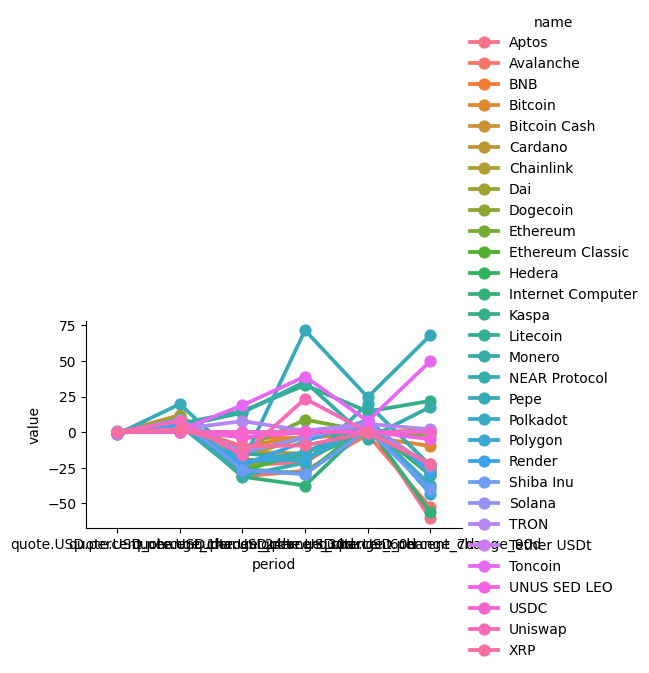

In [37]:
sns.catplot(x="period", y="value", hue="name", data=df_melted, kind="point")

In [39]:
df_24h = df_melted[df_melted['period'] == 'quote.USD.percent_change_24h']

In [40]:
top_10_24h = df_24h.sort_values(by='value', ascending=False).head(10)

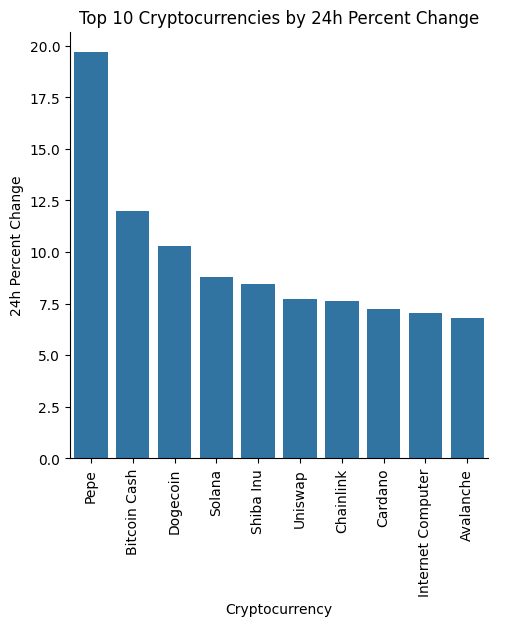

In [41]:
sns.catplot(x="name", y="value", data=top_10_24h, kind="bar")
plt.xticks(rotation=90)  # Roateer de x-as labels indien nodig
plt.title("Top 10 Cryptocurrencies by 24h Percent Change")
plt.xlabel("Cryptocurrency")
plt.ylabel("24h Percent Change")
plt.show()

In [42]:
df_melted['period'] = df_melted['period'].apply(lambda x: x.replace('quote.USD.percent_change_', '').strip())


In [43]:
df_melted

,period,name,value
0,1h,Aptos,0.13860
1,24h,Aptos,4.34102
2,30d,Aptos,-23.09908
3,60d,Aptos,-21.25681
4,7d,Aptos,5.82748
...,...,...,...
175,24h,XRP,1.96463
176,30d,XRP,-9.96418
177,60d,XRP,-9.36377
178,7d,XRP,-0.34178


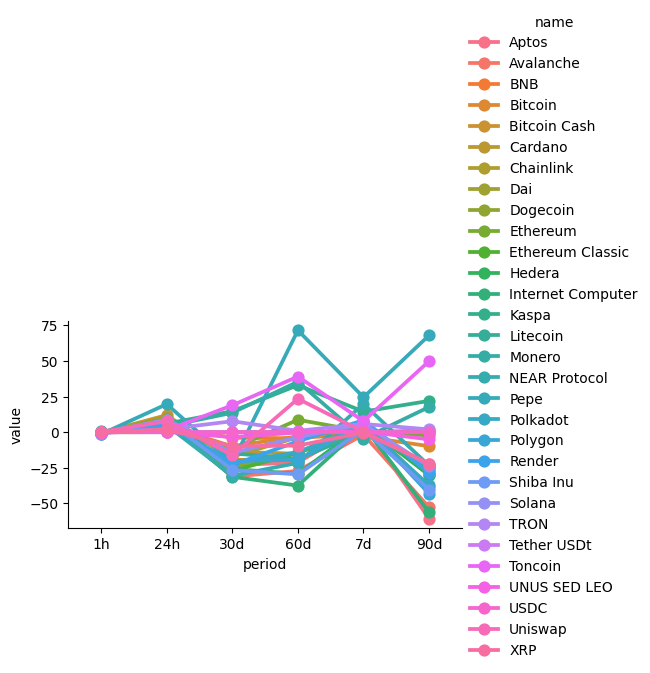

In [44]:
sns.catplot(x="period", y="value", hue="name", data=df_melted, kind="point")

In [49]:
df_30d = df_melted[df_melted['period'] == '30d']

In [50]:
top_10_30d = df_30d.sort_values(by='value', ascending=False).head(10)

In [51]:
top_10_names = top_10_30d['name'].tolist()

In [52]:
df_top_10 = df_melted[df_melted['name'].isin(top_10_names)]

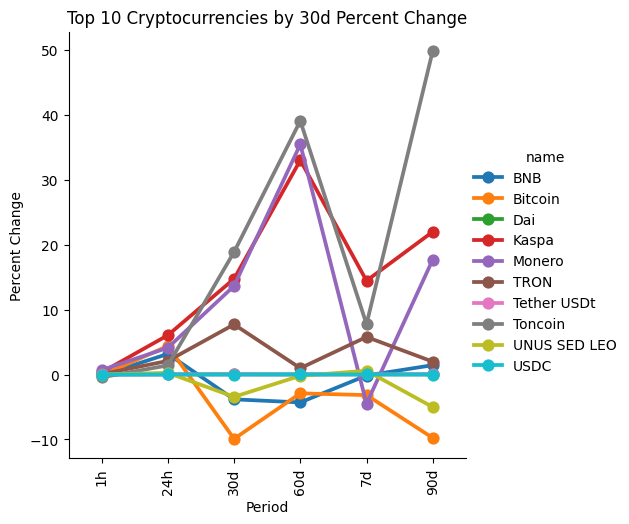

In [53]:
sns.catplot(x="period", y="value", hue="name", data=df_top_10, kind="point")
plt.xticks(rotation=90)  # Roateer de x-as labels indien nodig
plt.title("Top 10 Cryptocurrencies by 30d Percent Change")
plt.xlabel("Period")
plt.ylabel("Percent Change")
plt.show()